## Importing Libraries

In [1]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

CPU times: total: 3.88 s
Wall time: 5.12 s


## Importing Data

In [2]:
%%time
data = pd.read_csv(r"C:\Users\Pc\OneDrive\Pictures\Data science assignments\week 18\Assignments\Health Insurance Prediction\train.csv")
data.head()

CPU times: total: 781 ms
Wall time: 1.13 s


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
## Making a copy of the data for necessary EDA and preprocessing

In [4]:
%%time
df = data.copy()
df.head()

CPU times: total: 15.6 ms
Wall time: 15.6 ms


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## EDA and Data Preprocesssing

In [5]:
%%time
print("The dimension of the DataFrame is,")
df.shape

The dimension of the DataFrame is,
CPU times: total: 31.2 ms
Wall time: 15.6 ms


(381109, 12)

In [6]:
%%time
# Printing the summary of the DataFrame's structure and content.
print("Summary of the DataFrame's structure and content-------")
df.info()

Summary of the DataFrame's structure and content-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
CPU times: total: 391 ms
Wall time: 425 ms

In [7]:
%%time
df.describe()

CPU times: total: 219 ms
Wall time: 426 ms


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
%%time
print("The skewness of the dataset is as follows - ")
print(df.skew())

The skewness of the dataset is as follows - 
id                      9.443274e-16
Age                     6.725390e-01
Driving_License        -2.159518e+01
Region_Code            -1.152664e-01
Previously_Insured      1.677471e-01
Annual_Premium          1.766087e+00
Policy_Sales_Channel   -9.000081e-01
Vintage                 3.029517e-03
Response                2.301906e+00
dtype: float64
CPU times: total: 344 ms
Wall time: 652 ms


<timed exec>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


In [9]:
print("Checking for null values.")
df.isnull().sum()

Checking for null values.


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
%%time
# Show only the duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []
CPU times: total: 297 ms
Wall time: 741 ms


## Vizualisation of Data

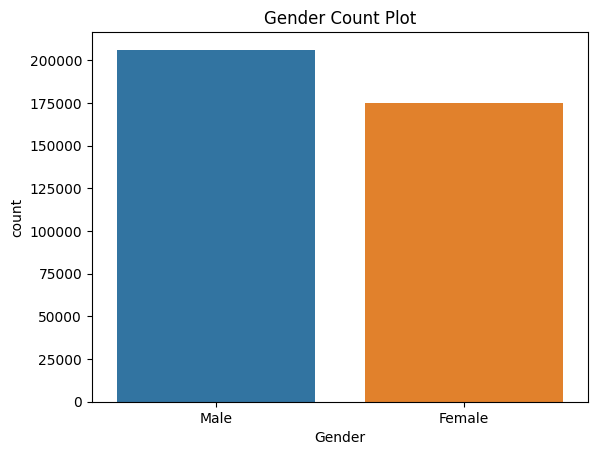

CPU times: total: 594 ms
Wall time: 660 ms


In [46]:
%%time 
sns.countplot(x="Gender", data = df)
plt.title("Gender Count Plot")
plt.savefig("Gender Count Plot.png")
plt.show()

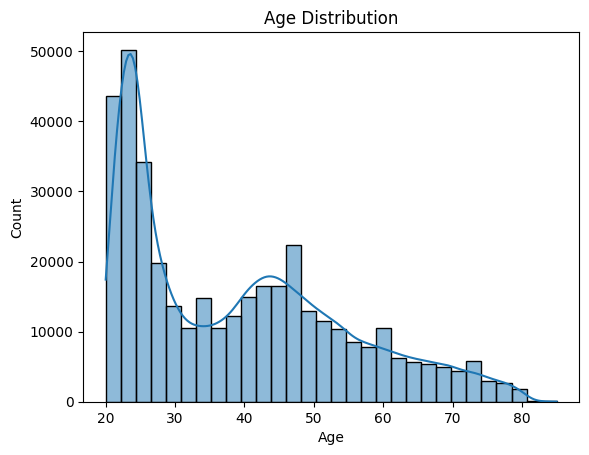

In [47]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.savefig("Age Distribution.png")
plt.show()

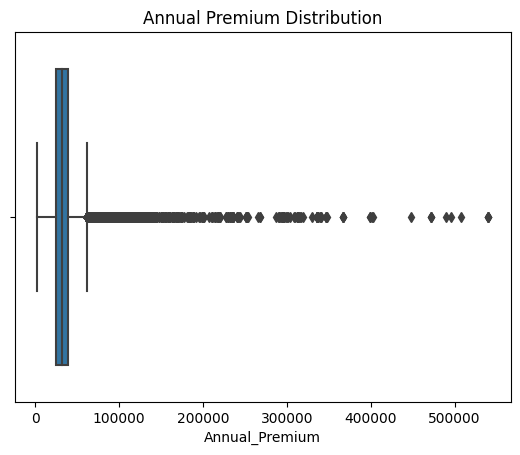

In [48]:
sns.boxplot(x="Annual_Premium", data=df)
plt.title("Annual Premium Distribution")
plt.savefig("Annual Premium Distribution.png")
plt.show()

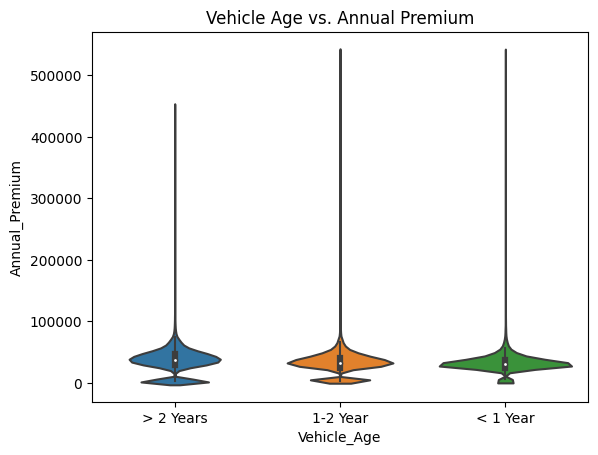

In [49]:
sns.violinplot(x="Vehicle_Age", y="Annual_Premium", data=df)
plt.title("Vehicle Age vs. Annual Premium")
plt.savefig("Vehicle Age vs. Annual Premium.png")
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_5476\3228735827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


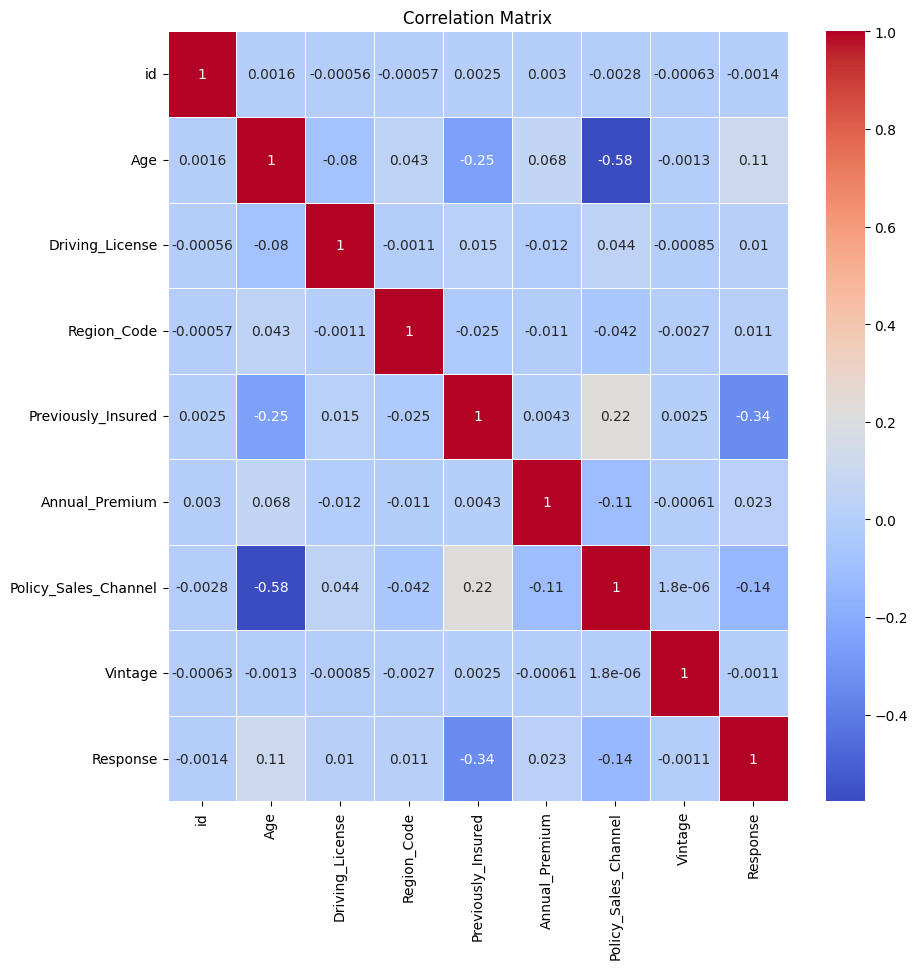

In [50]:
plt.figure(figsize=(10,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.savefig("Correlation Matrix.png")
plt.show()

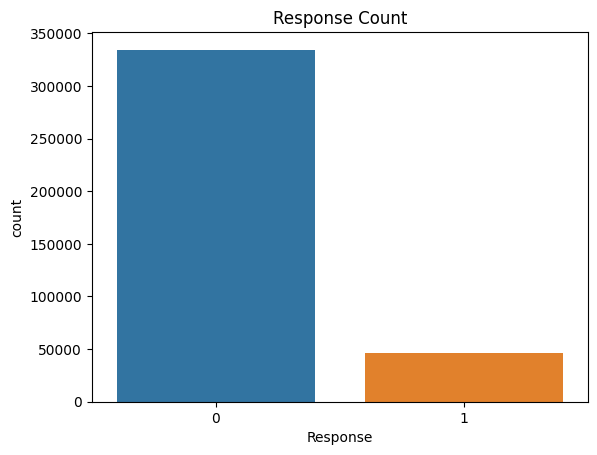

In [51]:
sns.countplot(x="Response", data=df)
plt.title("Response Count")
plt.savefig("Response count.png")
plt.show()

## Insights

In [17]:
## Total number of male
male_count = sum(df['Gender'] == "Male")
print("Total number of male are ",male_count,'.')

Total number of male are  206089 .


In [18]:
## Total number of female
female_count = sum(df['Gender'] == "Female")
print("Total number of female are ",female_count,'.')

Total number of female are  175020 .


In [19]:
## total number of customer who are interseted 
response_count = sum(df['Response'])
print("Total number of customers who are interseted are",response_count,'.')

Total number of customers who are interseted are 46710 .


In [20]:
## Total number of male who are interested
response_count_male = sum((df['Gender']=='Male') & (df['Response'] ==1 ))
print("Total number of male who are interseted are",response_count_male,'.')

Total number of male who are interseted are 28525 .


In [21]:
## Total number of male who are interested
response_count_female = sum((df['Gender']=='Female') & (df['Response'] ==1 ))
print("Total number of female who are interseted are",response_count_female,'.')

Total number of female who are interseted are 18185 .


In [22]:
## Total number of customers who have driving license
license_count = sum(df['Driving_License'])
print("Total number of customers who have driving license are",license_count,'.')

Total number of customers who have driving license are 380297 .


In [23]:
## Total number of male who have driving license
license_count_male = sum((df['Gender']=='Male') & (df['Driving_License'] ==1 ))
print("Total number of male who are interseted are",license_count_male,'.')

Total number of male who are interseted are 205489 .


In [24]:
## Total number of female who have driving license
license_count_female = sum((df['Gender']=='Female') & (df['Driving_License'] ==1 ))
print("Total number of female who are interseted are",license_count_female,'.')

Total number of female who are interseted are 174808 .


In [25]:
## Total number of people who were previously insured
prev_insured = sum(df['Previously_Insured']==1)
print("Total number of people who are already insured are",prev_insured,'.')

Total number of people who are already insured are 174628 .


In [26]:
## Total number of people who were not previously insured
prev_insured = sum(df['Previously_Insured'] ==0)
print("Total number of people who are already insured are",prev_insured,'.')

Total number of people who are already insured are 206481 .


In [27]:
## People who are not insured are have a higher chance of taking the insurance

## Preparing Data for Model

In [28]:
train_data = df.copy()
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [29]:
## Replacing Yes to 1 and No to 0 in the Vehicle_Damage column
train_data['Vehicle_Damage']  = train_data['Vehicle_Damage'].replace({'Yes':1,"No":0})
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [30]:
## Using One-hot encoding on Vehicle_Age column
train_data = pd.get_dummies(train_data, columns=['Vehicle_Age'], prefix='Vehicle_Age')
train_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,Male,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,2,Male,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,3,Male,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,4,Male,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,5,Female,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,0,30170.0,26.0,88,0,1,0,0
381105,381106,Male,30,1,37.0,1,0,40016.0,152.0,131,0,0,1,0
381106,381107,Male,21,1,30.0,1,0,35118.0,160.0,161,0,0,1,0
381107,381108,Female,68,1,14.0,0,1,44617.0,124.0,74,0,0,0,1


In [31]:
train_data = pd.get_dummies(train_data, columns=['Gender'], prefix='Gender')
train_data.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Gender_Female,Gender_Male
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1,0,1
1,2,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0,0,1
2,3,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1,0,1
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0,0,1
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0,1,0


In [32]:
## Saving the processed Train data

In [33]:
csv_file_path = 'train_cleaned.csv'
train_data.to_csv(csv_file_path, index=False)

In [34]:
train_data.columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years', 'Gender_Female', 'Gender_Male'],
      dtype='object')

## Doing necessary Changes in the test data 

In [35]:
test_df = pd.read_csv(r"C:\Users\Pc\OneDrive\Pictures\Data science assignments\week 18\Assignments\Health Insurance Prediction\test.csv")
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [36]:
test_df = pd.get_dummies(test_df, columns=['Vehicle_Age'], prefix='Vehicle_Age')
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,381110,Male,25,1,11.0,1,No,35786.0,152.0,53,0,1,0
1,381111,Male,40,1,28.0,0,Yes,33762.0,7.0,111,1,0,0
2,381112,Male,47,1,28.0,0,Yes,40050.0,124.0,199,1,0,0
3,381113,Male,24,1,27.0,1,Yes,37356.0,152.0,187,0,1,0
4,381114,Male,27,1,28.0,1,No,59097.0,152.0,297,0,1,0


In [37]:
test_df = pd.get_dummies(test_df, columns=['Gender'], prefix='Gender')
test_df

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Gender_Female,Gender_Male
0,381110,25,1,11.0,1,No,35786.0,152.0,53,0,1,0,0,1
1,381111,40,1,28.0,0,Yes,33762.0,7.0,111,1,0,0,0,1
2,381112,47,1,28.0,0,Yes,40050.0,124.0,199,1,0,0,0,1
3,381113,24,1,27.0,1,Yes,37356.0,152.0,187,0,1,0,0,1
4,381114,27,1,28.0,1,No,59097.0,152.0,297,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,26,1,37.0,1,No,30867.0,152.0,56,0,1,0,1,0
127033,508143,38,1,28.0,0,Yes,28700.0,122.0,165,1,0,0,1,0
127034,508144,21,1,46.0,1,No,29802.0,152.0,74,0,1,0,0,1
127035,508145,71,1,28.0,1,No,62875.0,26.0,265,1,0,0,0,1


In [38]:
## Replacing Yes to 1 and No to 0 in the Vehicle_Damage column
test_df['Vehicle_Damage']  = test_df['Vehicle_Damage'].replace({'Yes':1,"No":0})
test_df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Gender_Female,Gender_Male
0,381110,25,1,11.0,1,0,35786.0,152.0,53,0,1,0,0,1
1,381111,40,1,28.0,0,1,33762.0,7.0,111,1,0,0,0,1
2,381112,47,1,28.0,0,1,40050.0,124.0,199,1,0,0,0,1
3,381113,24,1,27.0,1,1,37356.0,152.0,187,0,1,0,0,1
4,381114,27,1,28.0,1,0,59097.0,152.0,297,0,1,0,0,1


In [39]:
## Saving the processed test data

In [40]:
csv_file_path = 'test_cleaned.csv'
test_df.to_csv(csv_file_path, index=False)